## Data Exploration

In [2]:
import pandas as pd

RAW_DATA_PATH = "../data/raw/KSI.csv"

df = pd.read_csv(RAW_DATA_PATH)
df.head(5)

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,OFFSET,...,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,ObjectId
0,-8.829728e+06,5.419071e+06,3389067,893184,2006,2006/01/01 05:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,1
1,-8.829728e+06,5.419071e+06,3389068,893184,2006,2006/01/01 05:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,2
2,-8.854874e+06,5.414091e+06,3442993,913296,2006,2006/06/25 04:00:00+00,2040,29 BLAIR ATHOL Cres,NaN,NaN,...,NaN,NaN,NaN,NaN,10,Princess-Rosethorn,10,Princess-Rosethorn (10),D22,3
3,-8.829728e+06,5.419071e+06,3389069,893184,2006,2006/01/01 05:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,4
4,-8.829728e+06,5.419071e+06,3389070,893184,2006,2006/01/01 05:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,5


In [31]:
df.shape

(17488, 57)

In [3]:
df.describe()

,X,Y,INDEX_,ACCNUM,YEAR,TIME,WARDNUM,LATITUDE,LONGITUDE,FATAL_NO,ObjectId
count,1.748800e+04,1.748800e+04,1.748800e+04,1.748800e+04,17488.000000,17488.000000,1.696300e+04,17488.000000,17488.000000,773.000000,17488.000000
mean,-8.838301e+06,5.420763e+06,3.643356e+07,2.220023e+09,2012.569190,1359.008978,2.571596e+03,43.710556,-79.395806,29.399741,8744.500000
std,1.160273e+04,8.655506e+03,3.695031e+07,3.215482e+09,4.479842,629.161368,1.864758e+05,0.056196,0.104229,17.974056,5048.495089
min,-8.865305e+06,5.402162e+06,3.363207e+06,2.530100e+04,2006.000000,0.000000,1.000000e+00,43.589678,-79.638390,1.000000,1.000000
25%,-8.846498e+06,5.413284e+06,5.373756e+06,1.073992e+06,2009.000000,920.000000,7.000000e+00,43.662001,-79.469447,14.000000,4372.750000
50%,-8.838366e+06,5.419556e+06,7.517348e+06,1.306974e+06,2012.000000,1445.000000,1.300000e+01,43.702745,-79.396390,28.000000,8744.500000
75%,-8.829649e+06,5.427830e+06,8.072255e+07,5.001557e+09,2016.000000,1848.000000,2.200000e+01,43.756457,-79.318090,43.000000,13116.250000
max,-8.807929e+06,5.443099e+06,8.166694e+07,9.085345e+09,2021.000000,2359.000000,1.716222e+07,43.855445,-79.122974,78.000000,17488.000000


### describe categorical features

In [4]:
categorical_index = df.dtypes[df.dtypes == 'object'].index
categorical = df[categorical_index]
categorical.describe()
# NEIGHBOURHOOD_158 is the new name for neighborhood so we can drop neighbourhood_140 and HOOD_140
# DIVISION DROP
# DATE might not be useful but the day of the week it is

,DATE,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,...,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION
count,17488,17488,15896,3028,17112,17453,17393,12038,17454,17470,...,2441,9039,1453,762,475,17488,17488,17488,17488,17488
unique,3735,1789,2637,444,10,4,7,9,10,8,...,1,1,1,1,1,159,159,141,141,17
top,2014/08/17 04:00:00+00,YONGE ST,BATHURST ST,10 m North of,Major Arterial,Toronto and East York,Intersection,At Intersection,No Control,Clear,...,Yes,Yes,Yes,Yes,Yes,1,West Humber-Clairville,77,Waterfront Communities-The Island (77),D42
freq,35,363,142,49,12471,5939,11561,8347,8421,15069,...,2441,9039,1453,762,475,557,557,673,673,1695


In [35]:
unique_count = categorical.nunique()
for feature in categorical[unique_count[unique_count == 1].index]:
    print(categorical[feature].value_counts())

# we can substitute any missing value of the features that have 'Yes' as a unique value with 'No' or 0 and 1

Yes    7079
Name: PEDESTRIAN, dtype: int64
Yes    1827
Name: CYCLIST, dtype: int64
Yes    15860
Name: AUTOMOBILE, dtype: int64
Yes    1482
Name: MOTORCYCLE, dtype: int64
Yes    1060
Name: TRUCK, dtype: int64
Yes    1069
Name: TRSN_CITY_VEH, dtype: int64
Yes    43
Name: EMERG_VEH, dtype: int64
Yes    6621
Name: PASSENGER, dtype: int64
Yes    2441
Name: SPEEDING, dtype: int64
Yes    9039
Name: AG_DRIV, dtype: int64
Yes    1453
Name: REDLIGHT, dtype: int64
Yes    762
Name: ALCOHOL, dtype: int64
Yes    475
Name: DISABILITY, dtype: int64


In [6]:
numerical = df.select_dtypes(include=['int64', 'float64'])
numerical.describe()
# X,Y and LATITUDE, LONGITUDE provide info about the location we can use just one
# ObjectId doesnt provide any relevant info DROP
# index is another unique identifier DROP
# ACCNUM can be used to calculate the number of passengers in an accident and the average age using INVAGE

,X,Y,INDEX_,ACCNUM,YEAR,TIME,WARDNUM,LATITUDE,LONGITUDE,FATAL_NO,ObjectId
count,1.748800e+04,1.748800e+04,1.748800e+04,1.748800e+04,17488.000000,17488.000000,1.696300e+04,17488.000000,17488.000000,773.000000,17488.000000
mean,-8.838301e+06,5.420763e+06,3.643356e+07,2.220023e+09,2012.569190,1359.008978,2.571596e+03,43.710556,-79.395806,29.399741,8744.500000
std,1.160273e+04,8.655506e+03,3.695031e+07,3.215482e+09,4.479842,629.161368,1.864758e+05,0.056196,0.104229,17.974056,5048.495089
min,-8.865305e+06,5.402162e+06,3.363207e+06,2.530100e+04,2006.000000,0.000000,1.000000e+00,43.589678,-79.638390,1.000000,1.000000
25%,-8.846498e+06,5.413284e+06,5.373756e+06,1.073992e+06,2009.000000,920.000000,7.000000e+00,43.662001,-79.469447,14.000000,4372.750000
50%,-8.838366e+06,5.419556e+06,7.517348e+06,1.306974e+06,2012.000000,1445.000000,1.300000e+01,43.702745,-79.396390,28.000000,8744.500000
75%,-8.829649e+06,5.427830e+06,8.072255e+07,5.001557e+09,2016.000000,1848.000000,2.200000e+01,43.756457,-79.318090,43.000000,13116.250000
max,-8.807929e+06,5.443099e+06,8.166694e+07,9.085345e+09,2021.000000,2359.000000,1.716222e+07,43.855445,-79.122974,78.000000,17488.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17488 entries, 0 to 17487
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  17488 non-null  float64
 1   Y                  17488 non-null  float64
 2   INDEX_             17488 non-null  int64  
 3   ACCNUM             17488 non-null  int64  
 4   YEAR               17488 non-null  int64  
 5   DATE               17488 non-null  object 
 6   TIME               17488 non-null  int64  
 7   STREET1            17488 non-null  object 
 8   STREET2            15896 non-null  object 
 9   OFFSET             3028 non-null   object 
 10  ROAD_CLASS         17112 non-null  object 
 11  DISTRICT           17453 non-null  object 
 12  WARDNUM            16963 non-null  float64
 13  LATITUDE           17488 non-null  float64
 14  LONGITUDE          17488 non-null  float64
 15  LOCCOORD           17393 non-null  object 
 16  ACCLOC             120

In [8]:
null_count = df.isnull().sum()

# percentage of empty values
null_percentage = null_count / len(df) * 100
null_percentage
# columns with a lot of missing values, should drop columns with null percentage higher than 15%
# df.drop(null_percentage[null_percentage > 15].index.values, axis=1, inplace=True)

X                     0.000000
Y                     0.000000
INDEX_                0.000000
ACCNUM                0.000000
YEAR                  0.000000
DATE                  0.000000
TIME                  0.000000
STREET1               0.000000
STREET2               9.103385
OFFSET               82.685270
ROAD_CLASS            2.150046
DISTRICT              0.200137
WARDNUM               3.002059
LATITUDE              0.000000
LONGITUDE             0.000000
LOCCOORD              0.543230
ACCLOC               31.164227
TRAFFCTL              0.194419
VISIBILITY            0.102928
LIGHT                 0.000000
RDSFCOND              0.131519
ACCLASS               0.040027
IMPACTYPE             0.022873
INVTYPE               0.080055
INVAGE                0.000000
INJURY                9.212031
FATAL_NO             95.579826
INITDIR              28.230787
VEHTYPE              17.343321
MANOEUVER            42.343321
DRIVACT              49.553980
DRIVCOND             49.571134
PEDTYPE 

Location graph

In [10]:
df['ACCLASS'].value_counts()

Non-Fatal Injury        15032
Fatal                    2442
Property Damage Only        7
Name: ACCLASS, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


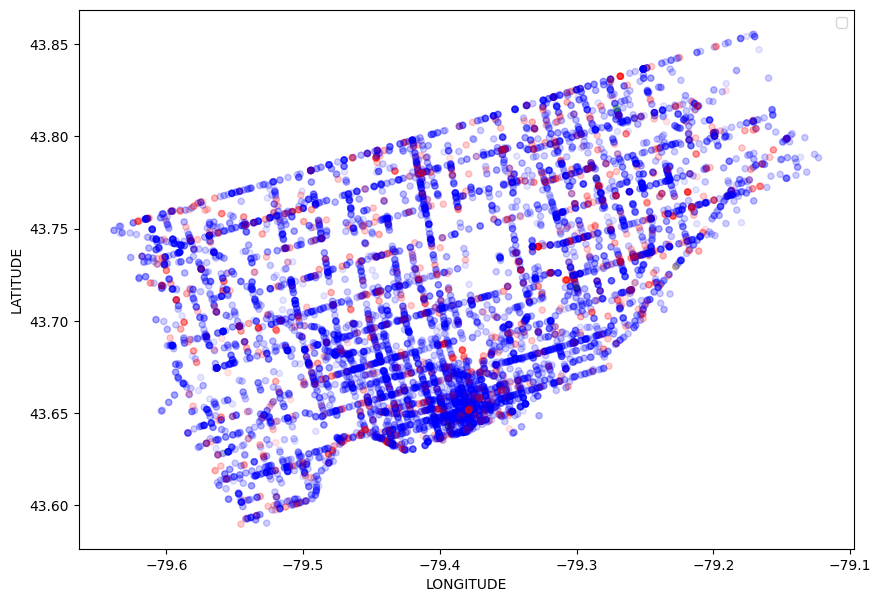

In [30]:
import matplotlib.pyplot as plt
colors = {'Non-Fatal Injury': 'blue', 'Fatal': 'red', 'Property Damage Only': 'green'}
color_map = df['ACCLASS'].map(colors).fillna('black')

df.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.1, figsize=(10,7),
        c = color_map, cmap=plt.get_cmap("jet"))
plt.legend()

## Drop columns

In [37]:
df.drop(['ObjectId', 'DIVISION','X','Y','INDEX_','OFFSET','ACCLOC','FATAL_NO','INITDIR','VEHTYPE','PEDTYPE','PEDACT','PEDCOND','CYCLISTYPE','CYCACT','CYCCOND','NEIGHBOURHOOD_140','HOOD_140'], axis=1, inplace=True)